In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [2]:
df = pd.read_csv('Coinbase_LTCUSD_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume LTC,Volume USD
0,2019-06-13 12-AM,LTCUSD,136.19,136.36,134.67,135.90,14884.60,2017721.55
1,2019-06-12 11-PM,LTCUSD,134.44,136.43,133.10,136.19,22260.61,3000986.00
2,2019-06-12 10-PM,LTCUSD,134.16,135.29,133.35,134.44,17806.83,2392344.84
3,2019-06-12 09-PM,LTCUSD,134.10,135.47,132.52,134.16,23498.92,3149235.30
4,2019-06-12 08-PM,LTCUSD,136.99,137.07,130.45,134.10,84324.78,11246269.94


In [3]:
nd = []
for i,(d,o,h,l,c,v) in df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume LTC']].iterrows():
    ds = d.split(' ')[0].split('-')
    hs = d.split(' ')[1].split('-')[:-1]
    ds = [int(x) for x in ds]
    hs = [int(x) for x in hs]
    nd.append(ds + hs + [0,0] + [o,h,l,c,v])
nd

[[2019, 6, 13, 12, 0, 0, 136.19, 136.36, 134.67, 135.9, 14884.6],
 [2019, 6, 12, 11, 0, 0, 134.44, 136.43, 133.1, 136.19, 22260.61],
 [2019, 6, 12, 10, 0, 0, 134.16, 135.29, 133.35, 134.44, 17806.83],
 [2019, 6, 12, 9, 0, 0, 134.1, 135.47, 132.52, 134.16, 23498.92],
 [2019, 6, 12, 8, 0, 0, 136.99, 137.07, 130.45, 134.1, 84324.78],
 [2019, 6, 12, 7, 0, 0, 137.91, 138.94, 136.29, 136.99, 17255.47],
 [2019, 6, 12, 6, 0, 0, 138.12, 138.74, 137.15, 137.91, 20093.35],
 [2019, 6, 12, 5, 0, 0, 141.3, 141.86, 134.69, 138.12, 79439.6],
 [2019, 6, 12, 4, 0, 0, 142.87, 143.5, 141.2, 141.3, 36218.11],
 [2019, 6, 12, 3, 0, 0, 139.72, 144.34, 139.01, 142.87, 52064.84],
 [2019, 6, 12, 2, 0, 0, 139.28, 140.34, 137.79, 139.72, 15911.18],
 [2019, 6, 12, 1, 0, 0, 138.94, 139.82, 138.4, 139.28, 9789.33],
 [2019, 6, 12, 12, 0, 0, 139.6, 141.0, 138.2, 138.94, 13144.15],
 [2019, 6, 12, 11, 0, 0, 138.99, 139.75, 138.49, 139.6, 7189.1],
 [2019, 6, 12, 10, 0, 0, 138.51, 140.5, 138.36, 138.99, 9591.59],
 [2019, 6

In [4]:
datamatrix = DataMatrix()
for y,mn,d,hr,m,s, o,h,l,c,v in nd:
    datamatrix.add_row(DateTime(y,mn,d,hr,m,s), o,h,l,c,int(v))

In [5]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2019-06-13 12:00:00,135.90,136.36,134.67,136.19,14884
2019-06-12 11:00:00,136.19,136.43,133.10,134.44,22260
2019-06-12 10:00:00,134.44,135.29,133.35,134.16,17806
2019-06-12 09:00:00,134.16,135.47,132.52,134.10,23498
2019-06-12 08:00:00,134.10,137.07,130.45,136.99,84324


In [6]:
len(datamatrix)

17078

In [7]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [8]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2019-06-13 12:00:00,135.90,136.36,134.67,136.19,14884
2019-06-12 11:00:00,136.19,136.43,133.10,134.44,22260
2019-06-12 10:00:00,134.44,135.29,133.35,134.16,17806
2019-06-12 09:00:00,134.16,135.47,132.52,134.10,23498
2019-06-12 08:00:00,134.10,137.07,130.45,136.99,84324


In [9]:
len(datamatrix)

17078

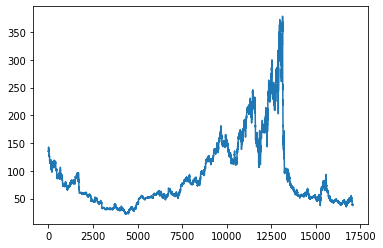

In [10]:
plot(datamatrix.close);

In [11]:
#datamatrix.dump_tsys("data.tsys")

In [12]:
a = array(datamatrix.close)

In [13]:
# Find best ARIMA params

#resDiff = sm.tsa.arma_order_select_ic(a, max_ar=7, max_ma=7, ic='aic', trend='c')
#print('ARIMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [14]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [15]:
import datamodel_super as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [16]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [17]:
dmodel.data.shape

(176, 16900)

In [18]:
dmodel.data[0:10, 0:5]

array([[ 0.39983309, -0.07660355,  0.65294005,  0.613237  , -0.48355985],
       [ 0.55963303,  0.06073652,  0.23928896,  1.20032117, -0.52218465],
       [ 0.40808044,  0.21642893,  0.33676825,  0.41253746,  0.08271857],
       [ 0.45442934,  0.39983675, -0.07660772,  0.65294787,  0.61324416],
       [ 0.04491948, -0.18001821,  0.14858641,  0.37548008,  0.26790119],
       [-0.05309016, -0.22562777, -0.02275388,  0.5327793 ,  0.31094523],
       [-0.1979477 , -0.10754749, -0.11131417,  0.107153  ,  0.30867013],
       [-0.33063787,  0.04490421, -0.18002985,  0.14856947,  0.37545947],
       [-0.17577238, -0.25670308, -0.37099062,  0.079721  ,  0.7254798 ],
       [-0.36918261, -0.22265052, -0.26545765,  0.04571724,  0.43262782]])

In [19]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 16900)

In [20]:
tgt[:, 0:5]

array([[102.38, 102.22, 103.53, 104.76, 103.78],
       [103.16, 103.27, 103.72, 106.  , 105.  ],
       [100.91, 101.39, 102.14, 103.06, 103.24],
       [101.58, 102.38, 102.22, 103.53, 104.76]])

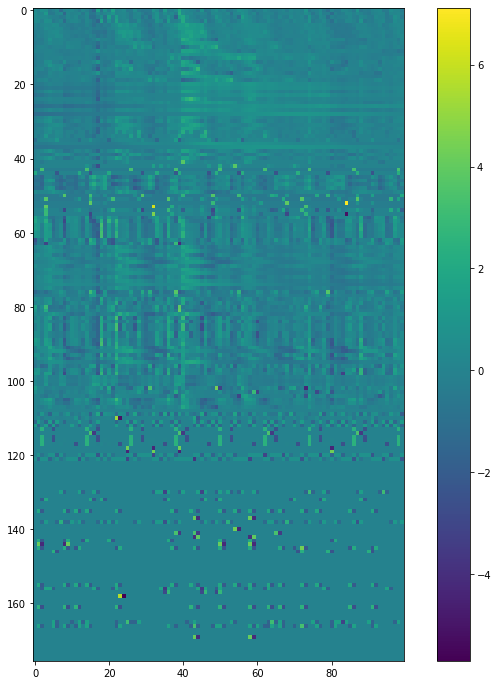

In [23]:
figure(figsize(12,12));
imshow(dmodel.data[:, 0:100]); colorbar();

In [24]:
np.save(open("data_ltc.npy",'wb'), dmodel.data)
np.save(open("data_ltc_targets.npy",'wb'), tgt)

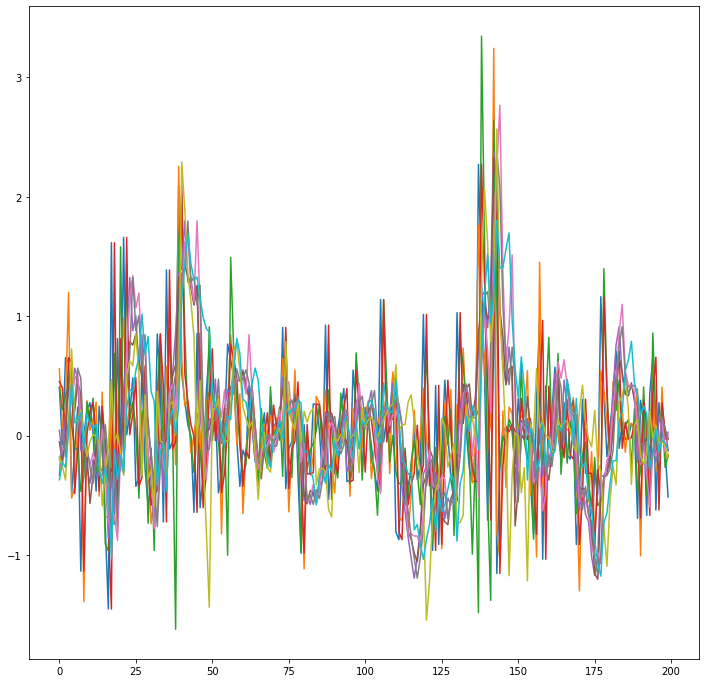

In [25]:
plot(dmodel.data.T[0:200, 0:10]);

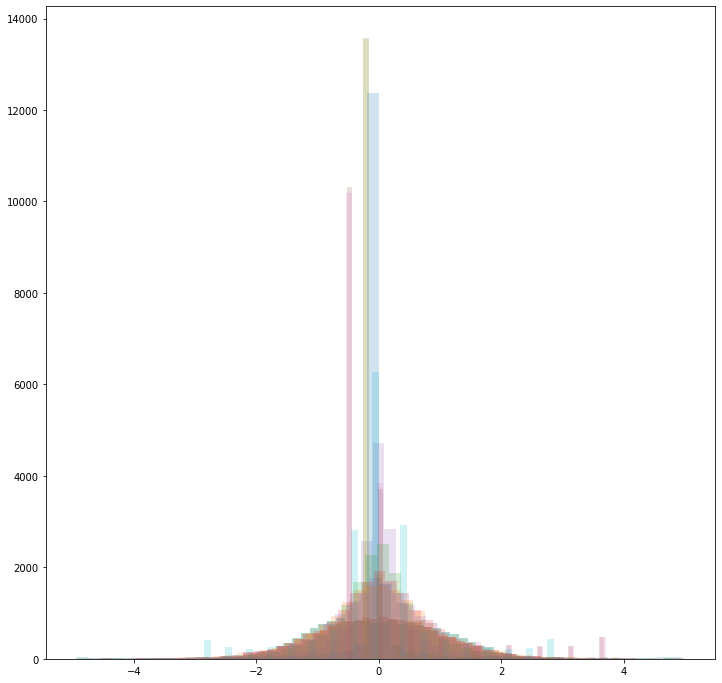

In [26]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);

In [27]:
mean(a)

0.0010495946160553233